In [1]:
import sqlalchemy as db

In [2]:
engine = db.create_engine('sqlite:///Library.db')

In [3]:
connect = engine.connect()

In [4]:
metadata = db.MetaData()

# Схема базы данных
#### 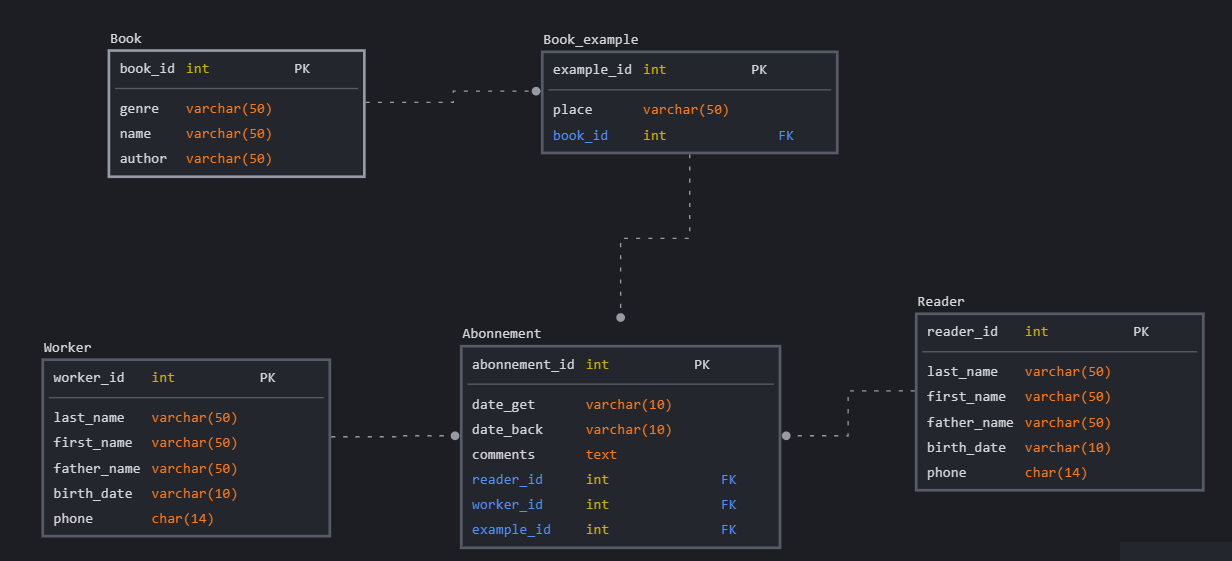

In [5]:
reader = db.Table(
    'Reader', metadata,
    db.Column('reader_id', db.Integer, primary_key=True, autoincrement=True),
    db.Column('last_name', db.String(50), nullable=False),
    db.Column('first_name', db.String(50), nullable=False),
    db.Column('father_name', db.String(50), nullable=False),
    db.Column('birth_date', db.String(10), nullable=False),
    db.Column('phone', db.String(14), nullable=False, unique=True),
    db.Column('abonnement_type', db.Text, nullable=False)
)

reader

Table('Reader', MetaData(), Column('reader_id', Integer(), table=<Reader>, primary_key=True, nullable=False), Column('last_name', String(length=50), table=<Reader>, nullable=False), Column('first_name', String(length=50), table=<Reader>, nullable=False), Column('father_name', String(length=50), table=<Reader>, nullable=False), Column('birth_date', String(length=10), table=<Reader>, nullable=False), Column('phone', String(length=14), table=<Reader>, nullable=False), Column('abonnement_type', Text(), table=<Reader>, nullable=False), schema=None)

In [6]:
book = db.Table(
    'Book', metadata,
    db.Column('book_id', db.Integer, primary_key=True, autoincrement=True),
    db.Column('name', db.String(50), nullable=False),
    db.Column('author', db.String(50), nullable=False),
    db.Column('genre', db.String(50), nullable=False)
)

book

Table('Book', MetaData(), Column('book_id', Integer(), table=<Book>, primary_key=True, nullable=False), Column('name', String(length=50), table=<Book>, nullable=False), Column('author', String(length=50), table=<Book>, nullable=False), Column('genre', String(length=50), table=<Book>, nullable=False), schema=None)

In [7]:
worker = db.Table(
    'Worker', metadata,
    db.Column('worker_id', db.Integer, primary_key=True, autoincrement=True),
    db.Column('last_name', db.String(50), nullable=False),
    db.Column('first_name', db.String(50), nullable=False),
    db.Column('father_name', db.String(50), nullable=False),
    db.Column('birth_date', db.String(10), nullable=False),
    db.Column('phone', db.String(14), nullable=False, unique=True),
)

worker

Table('Worker', MetaData(), Column('worker_id', Integer(), table=<Worker>, primary_key=True, nullable=False), Column('last_name', String(length=50), table=<Worker>, nullable=False), Column('first_name', String(length=50), table=<Worker>, nullable=False), Column('father_name', String(length=50), table=<Worker>, nullable=False), Column('birth_date', String(length=10), table=<Worker>, nullable=False), Column('phone', String(length=14), table=<Worker>, nullable=False), schema=None)

In [8]:
book_example = db.Table(
    'Book_example', metadata,
    db.Column('example_id', db.Integer, primary_key=True, autoincrement=True),
    db.Column('place', db.String(50), nullable=False),
    db.Column('book_id', db.ForeignKey('Book.book_id'))
)

book_example

Table('Book_example', MetaData(), Column('example_id', Integer(), table=<Book_example>, primary_key=True, nullable=False), Column('place', String(length=50), table=<Book_example>, nullable=False), Column('book_id', Integer(), ForeignKey('Book.book_id'), table=<Book_example>), schema=None)

In [9]:
abonnement = db.Table(
    'Abonnement', metadata,
    db.Column('abonnement_id', db.Integer, primary_key=True, autoincrement=True),
    db.Column('date_get', db.String(50), nullable=False),
    db.Column('date_back', db.String(50), nullable=False),
    db.Column('comments', db.Text, nullable=True),
    db.Column('example_id', db.ForeignKey('Book_example.example_id')),
    db.Column('worker_id', db.ForeignKey('Worker.worker_id')),
    db.Column('reader_id', db.ForeignKey('Reader.reader_id'))
)

In [10]:
metadata.create_all(engine)

In [11]:
insertion_reader = reader.insert().values([
    {'last_name': 'Котова', 'first_name': 'Ксения', 'father_name': 'Андреевна', 'birth_date': '2002-10-17', 'phone': '+375291111111', 'abonnement_type': 'Студенческий'},
    {'last_name': 'Иванов', 'first_name': 'Иван', 'father_name': 'Иванович', 'birth_date': '1984-09-10', 'phone': '+375292222222', 'abonnement_type': 'Взрослый'},
    {'last_name': 'Петров', 'first_name': 'Петр', 'father_name': 'Петрович', 'birth_date': '2010-05-30', 'phone': '+375293333333', 'abonnement_type': 'Детский'},
])

insertion_worker = worker.insert().values([
    {'last_name': 'Смирнов', 'first_name': 'Николай', 'father_name': 'Петрович', 'birth_date': '1965-07-19', 'phone': '+375294444444'},
    {'last_name': 'Кузнецов', 'first_name': 'Михаил', 'father_name': 'Александрович', 'birth_date': '1991-01-02', 'phone': '+375295555555'},
    {'last_name': 'Соколова', 'first_name': 'Раиса', 'father_name': 'Константиновна', 'birth_date': '1951-06-21', 'phone': '+375296666666'}
])

insertion_book = book.insert().values([
    {'name': 'Мастер и Маргарита', 'author': 'Булгаков', 'genre': 'Роман'},
    {'name': 'Машинное обучение', 'author': 'Головатая', 'genre': 'Научная литература'},
    {'name': 'Гарри Поттер', 'author': 'Роулинг', 'genre': 'Роман'}
])

insertion_book_example = book_example.insert().values([
    {'place': 'Полка 1', 'book_id': 1},
    {'place': 'Полка 2', 'book_id': 2},
    {'place': 'Полка 3', 'book_id': 3}
])

insertion_abonnement = abonnement.insert().values([
    {'date_get': '2024-03-01', 'date_back': '2024-03-31', 'comments': 'Чистая', 'example_id': 1, 'worker_id': 1, 'reader_id': 1},
    {'date_get': '2024-03-01', 'date_back': '2024-03-31', 'comments': 'Карандаш', 'example_id': 2, 'worker_id': 2, 'reader_id': 2},
    {'date_get': '2024-03-01', 'date_back': '2024-03-31', 'comments': 'Порвана', 'example_id': 3, 'worker_id': 3, 'reader_id': 3}
])


In [12]:
connect.execute(insertion_book)

In [13]:
connect.execute(insertion_reader)

In [14]:
connect.execute(insertion_worker)

In [15]:
connect.execute(insertion_book_example)

In [16]:
connect.execute(insertion_abonnement)

In [17]:
select_all_query = db.select(reader)
select_result = connect.execute(select_all_query)
select_result

In [18]:
select_result.fetchall()

[(1, 'Котова', 'Ксения', 'Андреевна', '2002-10-17', '+375291111111', 'Студенческий'),
 (2, 'Иванов', 'Иван', 'Иванович', '1984-09-10', '+375292222222', 'Взрослый'),
 (3, 'Петров', 'Петр', 'Петрович', '2010-05-30', '+375293333333', 'Детский')]

# Запрос HAVING
### Фильтрация данных по имени, длина которого больше 5

In [19]:
query_having = db.select(reader).group_by(reader.c.reader_id).having(db.func.length(reader.c.first_name) > 5)
result_having = connect.execute(query_having)
result_having

In [20]:
result_having.fetchall()

[(1, 'Котова', 'Ксения', 'Андреевна', '2002-10-17', '+375291111111', 'Студенческий')]

# Запрос JOIN LEFT
### Найти место нахождения книги с номером book_id = 2 из таблицы Экземпляр книги 

In [21]:
query_join_left = db.select(book_example.c.place, book.c.name).select_from(
    db.outerjoin(book_example, book, book_example.c.book_id == book.c.book_id)).where(book.c.book_id == 2)
result_join_left = connect.execute(query_join_left)
result_join_left

In [22]:
result_join_left.fetchall()

[('Полка 2', 'Машинное обучение')]

# Запрос INNER JOIN
### Объединение всех данных из таблиц Читатель и Абонемент

In [23]:
query_inner_join = db.select(reader, abonnement).select_from(db.join(abonnement, reader, abonnement.c.reader_id == reader.c.reader_id)).where(
    abonnement.c.example_id == book_example.c.example_id)
result_inner_join = connect.execute(query_inner_join)
result_inner_join

In [24]:
result_inner_join.fetchall()

[(1, 'Котова', 'Ксения', 'Андреевна', '2002-10-17', '+375291111111', 'Студенческий', 1, '2024-03-01', '2024-03-31', 'Чистая', 1, 1, 1),
 (2, 'Иванов', 'Иван', 'Иванович', '1984-09-10', '+375292222222', 'Взрослый', 2, '2024-03-01', '2024-03-31', 'Карандаш', 2, 2, 2),
 (3, 'Петров', 'Петр', 'Петрович', '2010-05-30', '+375293333333', 'Детский', 3, '2024-03-01', '2024-03-31', 'Порвана', 3, 3, 3)]

# Запрос UNION
### Объединение записей (ФИО и номер телефона) из таблиц Reader и Worker

In [25]:
query_worker = db.select(worker.c.last_name, worker.c.first_name, worker.c.father_name, worker.c.phone)
query_reader = db.select(reader.c.last_name, reader.c.first_name, reader.c.father_name, reader.c.phone)

query_union = db.union_all(query_worker, query_reader)
query_union

In [26]:
result = connect.execute(query_union)
print(result.all())

[('Смирнов', 'Николай', 'Петрович', '+375294444444'), ('Кузнецов', 'Михаил', 'Александрович', '+375295555555'), ('Соколова', 'Раиса', 'Константиновна', '+375296666666'), ('Котова', 'Ксения', 'Андреевна', '+375291111111'), ('Иванов', 'Иван', 'Иванович', '+375292222222'), ('Петров', 'Петр', 'Петрович', '+375293333333')]


# Подзапрос 
### Поиск книги, находящейся на Полке 3

In [27]:
place_check = 'Полка 3'

subquery = db.select(book_example.c.book_id).where(book_example.c.place == place_check)
query = db.select(book).where(book.c.book_id.in_(subquery))

result_request = connect.execute(query)
result_request

In [28]:
result_request.fetchall()

[(3, 'Гарри Поттер', 'Роулинг', 'Роман')]

In [173]:
connect.close()

In [174]:
engine.dispose()